In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [40]:
fp = open('binary_image_file.tiff', 'rb')
raw_bytes = fp.read()
fp.close()
img_size = (324, 324, 3)

In [41]:
len(raw_bytes)

318500

In [42]:
img_size[0]*img_size[1]*img_size[2]

314928

In [43]:
# get rid of header
img_start = len(raw_bytes) - img_size[0]*img_size[1]*img_size[2]

In [44]:
raw_bytes[img_start:].hex()[:10]

'ffffffffff'

In [45]:
raw_bytes_hex = raw_bytes[img_start:].hex()

In [46]:
hexs = [a + b for a, b in zip(raw_bytes_hex[:-1:2], raw_bytes_hex[1::2])]

In [47]:
len(hexs)

314928

In [48]:
int(hexs[0], 16)

255

In [49]:
hex_as_ints = np.array([int(h, 16) for h in hexs], dtype=np.uint8)

In [50]:
len(hex_as_ints)

314928

In [51]:
ints_square = hex_as_ints.reshape(*img_size)

In [52]:
ints_square.shape

(324, 324, 3)

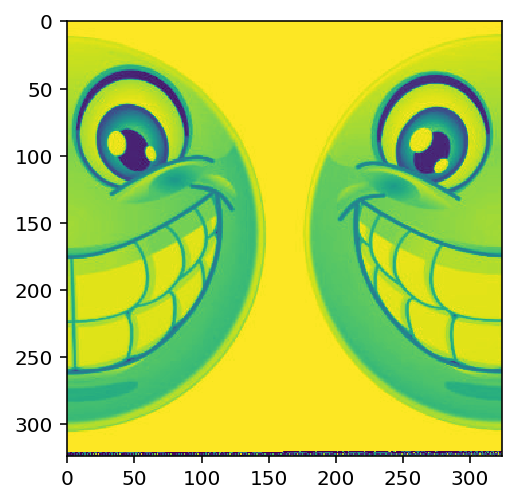

In [55]:
import matplotlib.pyplot as plt
plt.imshow(ints_square[:, :, 0])

In [173]:
hexs[:4]

['ff', 'ff', 'ff', 'ff']

In [176]:
chr(int(hexs[0], 16))

'ÿ'

In [247]:
hex_as_chars = [ascii(255 - int(h, 16)) for h in hexs]

In [248]:
print(hex_as_chars[52400:52500])

['176', '157', '151', '236', '225', '223', '219', '228', '223', '231', '230', '225', '218', '217', '215', '218', '221', '226', '224', '229', '235', '203', '215', '241', '98', '142', '215', '8', '88', '209', '10', '95', '224', '16', '69', '185', '11', '43', '90', '11', '29', '115', '4', '26', '86', '13', '33', '106', '9', '27', '109', '10', '36', '97', '10', '30', '99', '10', '30', '99', '10', '30', '99', '10', '30', '99', '10', '30', '99', '10', '30', '99', '10', '30', '99', '10', '30', '99', '10', '30', '99', '10', '30', '99', '10', '30', '99', '10', '30', '99', '10', '30', '99', '10', '30', '99', '10', '30', '99', '10']


In [249]:
first = []
for l in hex_as_chars:
    first.append(l)

In [250]:
len(first)

314928

In [251]:
lines = []
for lp in range(0, 324*324, 324):
    lines.append(' '.join(first[lp:lp+324]))

In [252]:
with open('foo.txt', 'wt') as fp:
    fp.writelines(lines)